In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def preprocess():
    """ 
     Input:
     Although this function doesn't have any input, you are required to load
     the MNIST data set from file 'mnist_all.mat'.

     Output:
     train_data: matrix of training set. Each row of train_data contains 
       feature vector of a image
     train_label: vector of label corresponding to each image in the training
       set
     validation_data: matrix of training set. Each row of validation_data 
       contains feature vector of a image
     validation_label: vector of label corresponding to each image in the 
       training set
     test_data: matrix of training set. Each row of test_data contains 
       feature vector of a image
     test_label: vector of label corresponding to each image in the testing
       set
    """

    mat = loadmat('mnist_all.mat')  # loads the MAT object as a Dictionary

    full_train_data=None
    for i in range(10):
        if i==0:
            a=mat['train'+str(i)].shape[0]
            new_col=np.array([i]*a).reshape(a,1)
            new=np.append(mat['train'+str(i)],new_col,axis=1)
            full_train_data=new
        else:
            a=mat['train'+str(i)].shape[0]
            new_col=np.array([i]*a).reshape(a,1)
            new_=np.append(mat['train'+str(i)],new_col,axis=1)
            full_train_data=np.vstack((full_train_data,new_))

    #Test Data
    full_test_data=None
    for i in range(10):
        if i==0:
            a=mat['test'+str(i)].shape[0]
            new_col=np.array([i]*a).reshape(a,1)
            new=np.append(mat['test'+str(i)],new_col,axis=1)
            full_test_data=new
        else:
            a=mat['test'+str(i)].shape[0]
            new_col=np.array([i]*a).reshape(a,1)
            new_=np.append(mat['test'+str(i)],new_col,axis=1)
            full_test_data=np.vstack((full_test_data,new_))
            
    #Feature Selection
    train_data=full_train_data[:,0:784]
    test_data=full_test_data[:,0:784]

    train_label=full_train_data[:,784:785].reshape(train_data.shape[0],1)
    test_label=full_test_data[:,784:785].reshape(test_data.shape[0],1)

    a = range(train_data.shape[0])

    aperm = np.random.permutation(a)

    validation_data = train_data[aperm[0:10000,:]
    validation_label=train_label[aperm[0:10000,:].reshape(validation_data.shape[0],1)

    train_data = train_data[aperm[10000:],:]
    train_label=train_label[aperm[10000:],:]

    
    n_feature = mat.get("train1").shape[1]
    n_sample = 0
    for i in range(10):
        n_sample = n_sample + mat.get("train" + str(i)).shape[0]
    n_validation = 1000
    n_train = n_sample - 10 * n_validation

    # Construct validation data
    validation_data = np.zeros((10 * n_validation, n_feature))
    for i in range(10):
        validation_data[i * n_validation:(i + 1) * n_validation, :] = mat.get("train" + str(i))[0:n_validation, :]

    # Construct validation label
    validation_label = np.ones((10 * n_validation, 1))
    for i in range(10):
        validation_label[i * n_validation:(i + 1) * n_validation, :] = i * np.ones((n_validation, 1))

    # Construct training data and label
    train_data = np.zeros((n_train, n_feature))
    train_label = np.zeros((n_train, 1))
    temp = 0
    for i in range(10):
        size_i = mat.get("train" + str(i)).shape[0]
        train_data[temp:temp + size_i - n_validation, :] = mat.get("train" + str(i))[n_validation:size_i, :]
        train_label[temp:temp + size_i - n_validation, :] = i * np.ones((size_i - n_validation, 1))
        temp = temp + size_i - n_validation

    # Construct test data and label
    n_test = 0
    for i in range(10):
        n_test = n_test + mat.get("test" + str(i)).shape[0]
    test_data = np.zeros((n_test, n_feature))
    test_label = np.zeros((n_test, 1))
    temp = 0
    for i in range(10):
        size_i = mat.get("test" + str(i)).shape[0]
        test_data[temp:temp + size_i, :] = mat.get("test" + str(i))
        test_label[temp:temp + size_i, :] = i * np.ones((size_i, 1))
        temp = temp + size_i

    # Delete features which don't provide any useful information for classifiers
    sigma = np.std(train_data, axis=0)
    index = np.array([])
    for i in range(n_feature):
        if (sigma[i] > 0.001):
            index = np.append(index, [i])
    train_data = train_data[:, index.astype(int)]
    validation_data = validation_data[:, index.astype(int)]
    test_data = test_data[:, index.astype(int)]

    # Scale data to 0 and 1
    train_data /= 255.0
    validation_data /= 255.0
    test_data /= 255.0
    print("done")
    return train_data, train_label, validation_data, validation_label, test_data, test_label

train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()





done


In [2]:
kernel_list = []
train_acc = []
validation_acc = []
test_acc = []
gamma_list = []

kernel_list.append("Linear")
clf=SVC(kernel='linear')
clf.fit(train_data,train_label.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:

train_acc.append(accuracy_score(clf.predict(train_data), train_label))


In [4]:
train_acc

[0.97286]

In [ ]:
validation_acc.append(clf.score(validation_data,validation_label))
test_acc.append(clf.score(test_data,test_label))
gamma_list.append(0)
print("1")

In [ ]:



clf=SVC(kernel='rbf',gamma=1.0)
clf.fit(train_data,train_label.ravel())
train_acc.append(clf.score(train_data,train_label))
validation_acc.append(clf.score(validation_data,validation_label))
test_acc.append(clf.score(test_data,test_label))
kernel_list.append("RBF")
gamma_list.append(1)
print("2")



clf=SVC(kernel='rbf')
clf.fit(train_data,train_label.ravel())
train_acc.append(clf.score(train_data,train_label))
validation_acc.append(clf.score(validation_data,validation_label))
test_acc.append(clf.score(test_data,test_label))
kernel_list.append("RBF")
gamma_list.append(0)
print("3")


cost_list = []
for i in range(1,11):
    clf = SVC(C = (10*i), kernel = "rbf")
    clf.fit(train_data, train_lavel.ravel())
    train_acc.append(clf.score(train_data, train_label))
    validation_acc.append(clf.score(validation_data, validation_label))
    test_acc.append(clf.score(test_data, test_label))
    kernel_list.append("RBF")
    cost_list.append(i*10)
    print(i)
    

1


In [2]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 40C1-0EB8

 Directory of D:\Spring 2018\ML\Assignments\assignment3_new\Assignment3\basecode

05/10/2018  06:37 PM    <DIR>          .
05/10/2018  06:37 PM    <DIR>          ..
05/10/2018  04:57 PM    <DIR>          .ipynb_checkpoints
05/10/2018  01:36 PM           157,421 BLR_test_plot_classif_report.png
05/10/2018  01:36 PM           154,329 BLR_train_plot_classif_report.png
05/10/2018  01:29 PM           130,090 MLR.ipynb
05/10/2018  01:27 PM           150,102 MLR_test_plot_classif_report.png
05/10/2018  01:27 PM           153,814 MLR_train_plot_classif_report.png
01/23/2018  11:04 PM        13,337,300 mnist_all.mat
05/10/2018  01:36 PM           131,023 Script.ipynb
04/29/2018  05:48 PM             9,086 script.py
05/10/2018  06:37 PM           978,952 SVM.ipynb
05/09/2018  06:15 PM           157,421 test_plot_classif_report.png
05/09/2018  06:15 PM           154,329 train_plot_classif_report.png
              11 File(s)     15,513

In [3]:
import pickle
args = pickle.load(open("SVM_results.pickle", "rb" ))

cost = args['cost']
gamma = args['gamma']
kernel = args['kernel']
test_accuracy = args['test_acc']
train_accuracy = args['train_acc']
validation_accuracy = args['val_acc']

In [4]:
temp = [0,0,0]
temp.extend(cost)
cost = temp

temp = 10*[0]
gamma.extend(temp)

In [5]:
print(len(cost))
print(len(gamma))
print(len(kernel))
print(len(test_accuracy))
print(len(train_accuracy))
print(len(validation_accuracy))

13
13
13
13
13
13


In [6]:
import pandas as pd
dataframe = pd.DataFrame({'cost':cost,
                         'gamma':gamma,
                         'kernel':kernel,
                         'test_acc':test_accuracy,
                         'train_acc':train_accuracy,
                         'validation_acc':validation_accuracy})

dataframe

,cost,gamma,kernel,test_acc,train_acc,validation_acc
0,0,0,Linear,0.9378,0.97286,0.9364
1,0,1,RBF,0.1714,1.00000,0.1548
2,0,0,RBF,0.9442,0.94294,0.9402
3,10,0,RBF,0.9610,0.97132,0.9618
4,20,0,RBF,0.9667,0.97952,0.9690
5,30,0,RBF,0.9704,0.98372,0.9710
6,40,0,RBF,0.9719,0.98706,0.9723
7,50,0,RBF,0.9719,0.99002,0.9731
8,60,0,RBF,0.9716,0.99196,0.9738
9,70,0,RBF,0.9726,0.99340,0.9736


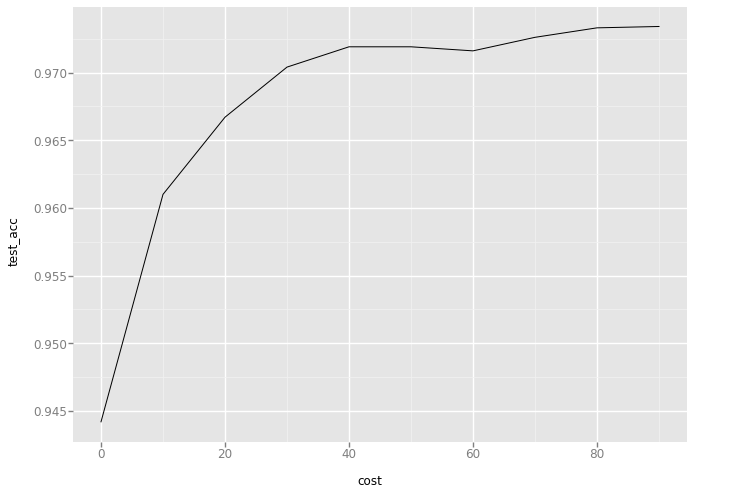

<ggplot: (193252499604)>

In [11]:
from ggplot import *

ggplot(aes(x='cost', y='test_acc'), data=dataframe[2:12]) +\
    geom_line() 

In [16]:
import pickle
args = pickle.load(open("SVM_results_fulldata.pickle", "rb" ))
args

{'cost': [100],
 'gamma': [0],
 'kernel': ['RBF'],
 'test_acc': [0.974],
 'train_acc': [0.99612],
 'val_acc': [0.9741]}

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = pca.fit_transform(train_data).reshape(50000,2)

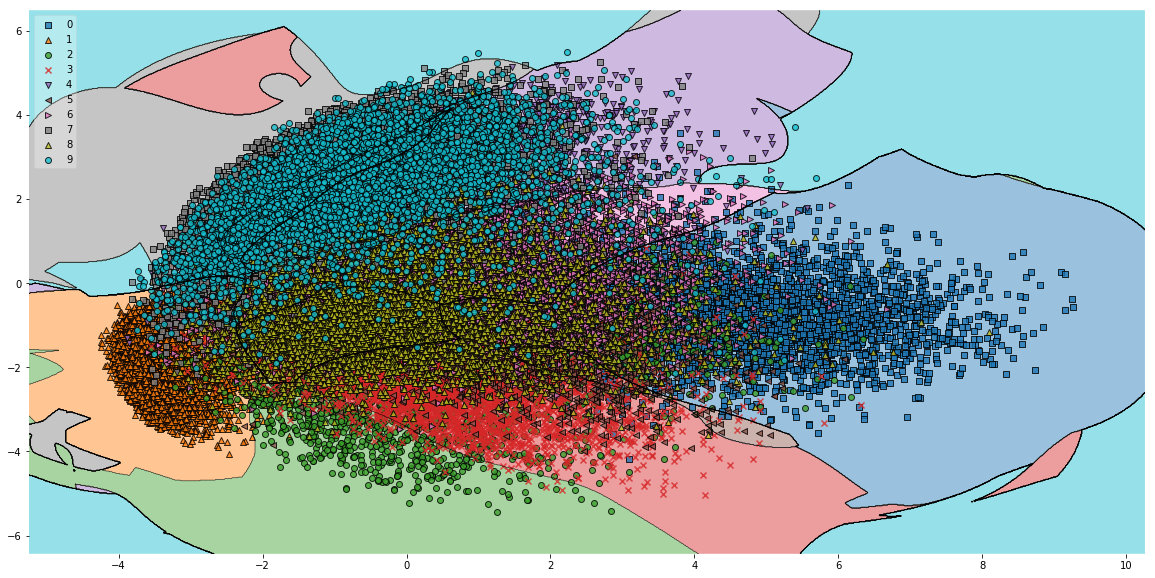

In [17]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))
# Decision region for feature 3 = 1.5
clf = SVC(C = 100, kernel = "rbf")
clf.fit(features, train_label.ravel())

plot_decision_regions(features, train_label.astype(np.integer).reshape(50000,), clf=clf,
                      legend=2, ax=ax)
